In [1]:
abs= 'With three words'
import re



In [2]:
s = 'A message from csev@umich.edu to cwen@iupui.edu about meeting @2PM'
lst = re.findall('\\S+@\\S+', s)
print(lst)

['csev@umich.edu', 'cwen@iupui.edu']


In [3]:
x='My 2 favorite numbers are 19 and 42' 
y=re.findall('[0-9] ',x)
y

['2 ', '9 ']

Greedy vs Non Greedy

In [4]:
#Non
x='From: Using the : character'
y=re.findall('^F.+?:',x)
y

['From:']

In [5]:
s = 'A message from csev@umich.edu to cwen@iupui.edu about meeting @2PM'
lst = re.findall('\\S+@\\S+', s)
print(lst)

['csev@umich.edu', 'cwen@iupui.edu']


Practical Applications

In [6]:
#Version 1

data = 'From stephen.marquard@uct.ac.za Sat Jan 5 09:14:16 2008'
atpos = data.find('@')
print(atpos)

sppos=data.find(' ',atpos)
print(sppos)

host = data[atpos+1 : sppos]
print(host)

21
31
uct.ac.za


In [7]:
#Version 2

line = 'From stephen.marquard@uct.ac.za Sat Jan 5 09:14:16 2008'
words = line.split()
email = words[1]
email

'stephen.marquard@uct.ac.za'

In [8]:
#Version 3 (REGULAR EXPRESION)

lin  = 'From stephen.marquard@uct.ac.za Sat Jan 5 09:14:16 2008'
y=re.findall('@([^ ]*)',lin)
print(y)

#Redefine 

y=re.findall('From .*@([^ ]*)',lin)
print(y)

['uct.ac.za']
['uct.ac.za']


In [9]:
x='We just recevied a $10.00 for cookies'
y=re.findall('\$[0-9.]+',x)
print(y)

['$10.00']


Networking with Python

net-intro.com
Process are connect b some socket, is a endpoit of a bidirectional inter.process communication flow.
For example in internet

Browser - Server

Port Numbers: Extention of a phonenumber

Common TCP
https
http

Python can talk to sockets

In [10]:
#Example

import socket
mysock = socket.socket(socket.AF_INET, socket.SOCK_STREAM)
mysock.connect(('data.pr4e.org',80))

#Host = 'data.pr4e.org' , phone number
#Port =  80, Extention number

Applcation Protocol
¿Que vamos a enviar y/o que vamos recibir?

HTTP - Hypertext Transfer Protocol
A set of rules that all the parties follow so we can predict the behave

Tipical URL, CERN, created.
Process: Web Browser makes local cahnges y then it makes a request to a serve, phone call, the server then send throuh html file

Create Web Browser with Python

In [11]:
import socket

mysock = socket.socket(socket.AF_INET, socket.SOCK_STREAM)
mysock.connect(('data.pr4e.org', 80))
cmd = 'GET http://data.pr4e.org/romeo.txt HTTP/1.0\r\n\r\n'.encode()
mysock.send(cmd)

while True:
    data = mysock.recv(512)
    if len(data) < 1:
        break
    print(data.decode(),end='')
mysock.close()

HTTP/1.1 200 OK
Date: Sun, 15 Jan 2023 02:17:12 GMT
Server: Apache/2.4.18 (Ubuntu)
Last-Modified: Sat, 13 May 2017 11:22:22 GMT
ETag: "a7-54f6609245537"
Accept-Ranges: bytes
Content-Length: 167
Cache-Control: max-age=0, no-cache, no-store, must-revalidate
Pragma: no-cache
Expires: Wed, 11 Jan 1984 05:00:00 GMT
Connection: close
Content-Type: text/plain

But soft what light through yonder window breaks
It is the east and Juliet is the sun
Arise fair sun and kill the envious moon
Who is already sick and pale with grief


UTF 8 (1-4 bytes, dynamic, include ASCII)
UFT 16 2 bytes
UTF 32 4 bytes
UNICODE 

encode()--UTF-8, transfoms a string into bytes
decode(), transforms from bytes to strings

Making it easy with URLLIB  

In [12]:
import urllib.request, urllib.parse, urllib.error

fhand = urllib.request.urlopen('http://data.pr4e.org/romeo.txt')
for line in fhand:
    print(line.decode().strip())
#Make a dcitionary

fhand2 = urllib.request.urlopen('http://data.pr4e.org/romeo.txt')
counts= {}
for line in fhand2:
    words = line.decode().split()
    for word in words:
        counts[word] = counts.get(word,0)+1
print(counts)


But soft what light through yonder window breaks
It is the east and Juliet is the sun
Arise fair sun and kill the envious moon
Who is already sick and pale with grief
{'But': 1, 'soft': 1, 'what': 1, 'light': 1, 'through': 1, 'yonder': 1, 'window': 1, 'breaks': 1, 'It': 1, 'is': 3, 'the': 3, 'east': 1, 'and': 3, 'Juliet': 1, 'sun': 2, 'Arise': 1, 'fair': 1, 'kill': 1, 'envious': 1, 'moon': 1, 'Who': 1, 'already': 1, 'sick': 1, 'pale': 1, 'with': 1, 'grief': 1}


Web Scraping with Python

Pull data of fome particular cosical dara, monitor new information, WARNING, not everyone is happy that you are scrapping.
The easy way is the free software BeautifulSoup ( Save for later )

Data on the WEB

XML, JSON. 'wire format'

XML

eXtensible Markuo Language

The primary is to help information systems share data structured.

XML Basics,

Start Tag  <person>
End Tag    </person>
Atribute   type="intl" 
Self closing tag <email hide="yes">

Like HTML, doesnt care White Space. XML as a TreeS

XML Schema

A contract, an XML Document and XML Schema Contract are used a Validation.
There are many languages XML Schemas.

Using a XSD Strucuture
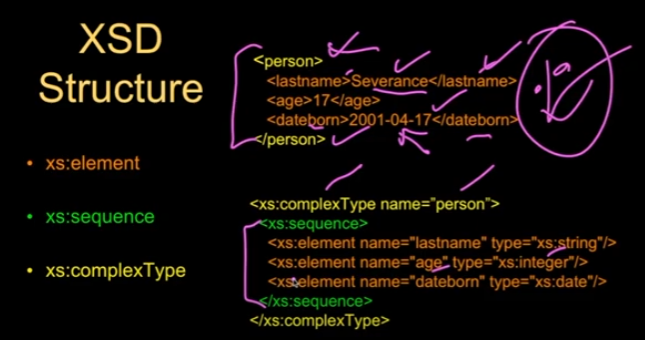



In [16]:
#talking XML through Pyhton

import xml.etree.ElementTree as ET
data='''
    <person>
        <name> Chuck </name>
        <phone type="intl">
        +1 734 303 4456
        </phone>
        <email hide="yes"/>
        </person>
    '''
tree = ET.fromstring(data)
print('Name',tree.find('name').text)
print('Attr:',tree.find('email').get('hide'))

Name  Chuck 
Attr: yes


JSON
Example

In [22]:
import json
data = '''{
    "name": "Chuck",
    "phone": {
        "type" : "intl",
        "number" : "+ 1 734 303 4456"
    },
    "email": {
        "hide": "yes"
    }
}
    '''
info = json.loads(data)  #Info is a dictionary
print('Name',info['name'])
print('Hide',info['email']['hide'])


#What will the following code print?:

import json
data = '''
  [
    { "id" : "001",
      "x" : "2",
     "name" : "Quincy"
    } ,
    { "id" : "009",
      "x" : "7",
      "name" : "Mrugesh"
    }
  ]
'''
info = json.loads(data)
print(info[1]['name'])


Name Chuck
Hide yes
Mrugesh


Service Oriented Approach:
Some applications cannot contain everything, like a vacation services that books you in diferent systems (airplane, hotels, tours).
For example Google Maps (geojson.py)

API's

Application Program Interface, is a contract that tells you if you do this then you can have informaiton.